# Scratch Paper:

In [1]:
import pandas as pd
import numpy as np

# Scikit-Learn:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import svm

# Sampling:
from imblearn.over_sampling import SMOTE, ADASYN

# XGBoost:
import xgboost as xgb

# Plots and Graphs:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scikitplot as skplt 
%matplotlib inline

# Other:
import warnings
warnings.filterwarnings('ignore')
# So we can see all columns:
pd.set_option('display.max_columns', None)

/Users/Thomas/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
dfi = pd.read_csv('aac_intakes_outcomes.csv.zip')
display(dfi.head())
dfi.info()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,2007,7,2017-12,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Colony Creek And Hunters Trace in Austin (TX),Normal,Stray,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,2007,7,2014-12,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research Blvd in Austin (TX),Normal,Public Assist,Neutered Male,1,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,3,2014,2014-03,Saturday,17,3.0,2007,7,2014-03,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research in Austin (TX),Normal,Public Assist,Neutered Male,1,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,2004,4,2014-04,10 years,A047759,Dog,Dachshund,Tricolor,Austin (TX),Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,1997,10,2013-11,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,12034 Research Blvd in Austin (TX),Injured,Public Assist,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
age_upon_outcome              79672 non-null object
animal_id_outcome             79672 non-null object
date_of_birth                 79672 non-null object
outcome_subtype               36348 non-null object
outcome_type                  79662 non-null object
sex_upon_outcome              79671 non-null object
age_upon_outcome_(days)       79672 non-null int64
age_upon_outcome_(years)      79672 non-null float64
age_upon_outcome_age_group    79672 non-null object
outcome_datetime              79672 non-null object
outcome_month                 79672 non-null int64
outcome_year                  79672 non-null int64
outcome_monthyear             79672 non-null object
outcome_weekday               79672 non-null object
outcome_hour                  79672 non-null int64
outcome_number                79672 non-null float64
dob_year                      79672 non-null int64
dob_month 

In [3]:
dfi['count'].value_counts()

1    79672
Name: count, dtype: int64

In [4]:
dfii = pd.read_csv('aac_intakes.csv.zip')

In [5]:
dfx = dfii[['animal_id', 'name', 'breed']]

In [6]:
df = dfi.set_index('animal_id_intake').join(dfx.set_index('animal_id'), 
                                            rsuffix = '_in', how = 'left')
#df[['name_in', 'animal_id_intake', 'animal_id_in']].tail()
#df[['name', 'breed', 'breed_in']].tail(20)

df['unique_id'] = df['animal_id_outcome'] + df['intake_number'].astype('str')

In [7]:
df = df.drop_duplicates(subset = ['unique_id'])

In [8]:
df = df[df['outcome_type'].isin(['Adoption', 'Transfer', 'Return to Owner'])]
df['outcome_type'].value_counts()

Adoption           33583
Transfer           23791
Return to Owner    14784
Name: outcome_type, dtype: int64

In [9]:
df.name.fillna(0, inplace = True)
df['has_name'] = df['name'].map(lambda x: 1 if not x == 0 else 0)

In [10]:
df.animal_type.value_counts()

Dog      43538
Cat      27568
Other      833
Bird       219
Name: animal_type, dtype: int64

In [11]:
df = df[df.animal_type != 'Bird']
df = df[df.animal_type != 'Other']
df.animal_type.value_counts()

Dog    43538
Cat    27568
Name: animal_type, dtype: int64

In [12]:
df.sex_upon_outcome.dropna(inplace = True)
df.sex_upon_intake.dropna(inplace = True)

col_to_keep = ['sex_upon_intake', 'age_upon_intake_(years)', 
               'time_in_shelter_days','animal_type', 'breed',
               'color', 'found_location', 'intake_condition', 
               'intake_type', 'intake_number', 'has_name',
               'outcome_datetime', 'outcome_type']
df_eda = df[col_to_keep]
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71106 entries, A006100 to A769066
Data columns (total 13 columns):
sex_upon_intake            71105 non-null object
age_upon_intake_(years)    71106 non-null float64
time_in_shelter_days       71106 non-null float64
animal_type                71106 non-null object
breed                      71106 non-null object
color                      71106 non-null object
found_location             71106 non-null object
intake_condition           71106 non-null object
intake_type                71106 non-null object
intake_number              71106 non-null float64
has_name                   71106 non-null int64
outcome_datetime           71106 non-null object
outcome_type               71106 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 7.6+ MB


In [13]:
df_eda['sex_upon_intake'].fillna('Unknown', inplace = True)

df_eda.isna().sum()

sex_upon_intake            0
age_upon_intake_(years)    0
time_in_shelter_days       0
animal_type                0
breed                      0
color                      0
found_location             0
intake_condition           0
intake_type                0
intake_number              0
has_name                   0
outcome_datetime           0
outcome_type               0
dtype: int64

In [14]:
dfi = df_eda

# Dummy Variables:

In [15]:
# sex_upon_intake
# Dummy variable, no change
# Maybe split into male/female and intact or no

In [16]:
dfi.sex_upon_intake.value_counts()

Intact Male      23618
Intact Female    22387
Neutered Male    11975
Spayed Female    10648
Unknown           2478
Name: sex_upon_intake, dtype: int64

In [17]:
dfi['sex'] = np.where(dfi['sex_upon_intake'].str.contains('Male'), 1, 0)
dfi['intact'] = np.where(dfi['sex_upon_intake'].str.contains('Intact'), 1, 0)
dfi['unk_sex'] = np.where(dfi['sex_upon_intake'].str.contains('Unknown'), 1, 0)
# dfi.drop(columns = 'sex_upon_intake', axis = 1, inplace = True)

In [18]:
# age_upon_intake_(years)
# scale

In [19]:
# time_in_shelter_days 
# Scale

In [20]:
# animal_type 
# Dummy for dog or cat
dfi['dog'] = dfi['animal_type'].map(lambda x: 1 if x == 'Dog' else 0)
dfi['cat'] = dfi['animal_type'].map(lambda x: 1 if x == 'Cat' else 0)

In [21]:
# breed
# Dummy for threshold of .05
def dum_sign(dummy_col, threshold=0.1):
    # removes the bind
    dummy_col = dummy_col.copy()
    # Ratio of dummy to rest of column
    count = pd.value_counts(dummy_col) / len(dummy_col)
    # Condition
    mask = dummy_col.isin(count[count > threshold].index)
    # Replaces 
    dummy_col[~mask] = "others"

    return pd.get_dummies(dummy_col, prefix=dummy_col.name)

# df_breed = dum_sign(dfi['breed'], threshold = .01)
df_breed = dum_sign(dfi['breed'], threshold = .005)
dfi = pd.concat([dfi, df_breed], axis = 1)

In [22]:
# color
# Dummy for top 10-20
# df_col = dum_sign(dfi['color'], threshold = .025)
df_col = dum_sign(dfi['color'], threshold = .01)
dfi = pd.concat([dfi, df_col], axis = 1)

In [23]:
# found_location
# Dummy for top ten, or possibly just Austin or outside Austin
# df_loc = dum_sign(dfi['found_location'], threshold = .01)
df_loc = dum_sign(dfi['found_location'], threshold = .005)
dfi = pd.concat([dfi, df_loc], axis = 1)

In [24]:
# intake_condition
# Regular dummy variables
cond_dummy = pd.get_dummies(dfi['intake_condition'])
dfi = pd.concat([dfi, cond_dummy], axis = 1)

In [25]:
# intake_type         
# Regular dummy variables
int_type_dummy = pd.get_dummies(dfi['intake_type'])
dfi = pd.concat([dfi, int_type_dummy], axis = 1)

In [26]:
# intake_number
# Dummy for 1, 2, 3, and 4+
dfi['count_1'] = dfi['intake_number'].map(lambda x: 1 if x == 1 else 0)
dfi['count_2'] = dfi['intake_number'].map(lambda x: 1 if x == 2 else 0)
dfi['count_3'] = dfi['intake_number'].map(lambda x: 1 if x == 3 else 0)
dfi['count_4_plus'] = dfi['intake_number'].map(lambda x: 1 if x > 3 else 0)

In [27]:
# has_name               
# Good to go

In [28]:
# outcome_datetime      
# TBD

In [29]:
# outcome_type  
# Need to convert to numericals in the same column. . . 
# Adoption = 1
# Transfer = 2
# Return to owner = 3
dfi.outcome_type.unique()
#dfi['outcome'] = dfi['outcome_type'].map(lambda x: 1 if x == 'Return to Owner' elif x == '')
#dfi['outcome'] = dfi['outcome_type'].map(lambda x: 2 if x == 'Transfer')
#dfi['outcome'] = dfi['outcome_type'].map(lambda x: 3 if x == 'Adoption')
dfi['outcome'] = dfi['outcome_type'].map(lambda x: 1 if x == 'Return to Owner' 
                                         else (2 if x == 'Transfer' 
                                               else 3))

# Testing Various ML Algos:

## X, y:

In [30]:
# DROPPING COLUMNS TO SCALE
'''
X = dfi.drop(['outcome', 'outcome_type', 'sex_upon_intake', 'age_upon_intake_(years)',
              'time_in_shelter_days', 'animal_type', 'breed', 
              'color', 'found_location', 'intake_condition', 'intake_type', 
              'intake_number', 'outcome_datetime'], axis = 1)
y = dfi['outcome']
'''

"\nX = dfi.drop(['outcome', 'outcome_type', 'sex_upon_intake', 'age_upon_intake_(years)',\n              'time_in_shelter_days', 'animal_type', 'breed', \n              'color', 'found_location', 'intake_condition', 'intake_type', \n              'intake_number', 'outcome_datetime'], axis = 1)\ny = dfi['outcome']\n"

In [31]:
# NOT DROPPING COLUMNS TO SCALE 
# 'age_upon_intake_(years)'
# 'time_in_shelter_days',
# '''
X = dfi.drop(['outcome', 'outcome_type', 'sex_upon_intake',
               'animal_type', 'breed', 'color', 
              'found_location', 'intake_condition', 'intake_type', 
              'intake_number', 'outcome_datetime'], axis = 1)
y = dfi['outcome']
# '''

## Train Test Split:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=123)

In [33]:
# SMOTE
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train) 

# Preview resampled sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 



3    26569
2    26569
1    26569
dtype: int64


## Bagged Trees:

In [34]:
'''
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', 
                                                        max_depth=10), 
                                                        n_estimators=200)
bagged_tree.fit(X_train, y_train)
'''

"\nbagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', \n                                                        max_depth=10), \n                                                        n_estimators=200)\nbagged_tree.fit(X_train, y_train)\n"

### BT Accuracy:

In [35]:
# bagged_tree.score(X_test, y_test)

## KNN:

In [36]:
# clf = KNeighborsClassifier(n_neighbors=10)

# Fit the classifier
# clf.fit(X_train, y_train)

### KNN Accuracy:

In [37]:
#y_pred = clf.predict(X_test)

In [38]:
#clf.score(X_test, y_test)

## Random Forest:

### Random Forest Pipeline Test:

Testing this with intake age and time in shelter.  If it crashes and burns, add those columns back to the drop list for X.

In [39]:
'''
scaled_pipeline_1 = Pipeline([('ss', StandardScaler()), 
                              ('forest', RandomForestClassifier(
                                  n_estimators=150, 
                                  max_depth= 19, 
                                  class_weight='balanced', 
                                  random_state = 123))])

scaled_pipeline_1.fit(X_train, y_train)
scaled_pipeline_1.score(X_test, y_test)
'''

"\nscaled_pipeline_1 = Pipeline([('ss', StandardScaler()), \n                              ('forest', RandomForestClassifier(\n                                  n_estimators=150, \n                                  max_depth= 19, \n                                  class_weight='balanced', \n                                  random_state = 123))])\n\nscaled_pipeline_1.fit(X_train, y_train)\nscaled_pipeline_1.score(X_test, y_test)\n"

In [40]:
#pred2 = scaled_pipeline_1.predict(X_test)
#print(confusion_matrix(y_test, pred2))

## SMOTE TEST:

In [41]:
'''
smote_rf = Pipeline([('ss', StandardScaler()), 
                     ('forest', RandomForestClassifier(n_estimators=200, 
                                                       max_depth= 23, 
                                                       random_state = 123))])

smote_rf.fit(X_train_resampled, y_train_resampled)
smote_rf.score(X_test, y_test)
'''

"\nsmote_rf = Pipeline([('ss', StandardScaler()), \n                     ('forest', RandomForestClassifier(n_estimators=200, \n                                                       max_depth= 23, \n                                                       random_state = 123))])\n\nsmote_rf.fit(X_train_resampled, y_train_resampled)\nsmote_rf.score(X_test, y_test)\n"

In [42]:
#pred3 = smote_rf.predict(X_test)
# print(confusion_matrix(y_test, pred3))

In [43]:
# 0.7920826887920124
# [[2426  144  368]
# [ 119 2737 1752]
# [ 147  427 6102]]

In [44]:
# smote_rf

## XGBoost:

In [45]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [46]:
'''
xg = xgb.XGBClassifier(learning_rate = .05, max_depth = 10, n_estimators = 200)
xg.fit(X_train, y_train)
training_preds = xg.predict(X_train)
val_preds = xg.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))
'''

'\nxg = xgb.XGBClassifier(learning_rate = .05, max_depth = 10, n_estimators = 200)\nxg.fit(X_train, y_train)\ntraining_preds = xg.predict(X_train)\nval_preds = xg.predict(X_test)\ntraining_accuracy = accuracy_score(y_train, training_preds)\nval_accuracy = accuracy_score(y_test, val_preds)\n\nprint("Training Accuracy: {:.4}%".format(training_accuracy * 100))\nprint("Validation accuracy: {:.4}%".format(val_accuracy * 100))\n'

In [47]:
'''
pred = xg.predict(X_test)
print(confusion_matrix(y_test, pred))
'''

'\npred = xg.predict(X_test)\nprint(confusion_matrix(y_test, pred))\n'

# Model comps

In [48]:
# Initialize lists
model_names = []
train_accuracies = []
test_accuracies = []
rto_precisions = []
rto_recalls = []
adopt_precisions = []
adopt_recalls = []

In [49]:
def rto_precision(model):
    training_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    training_accuracy = accuracy_score(y_train, training_preds)
    val_accuracy = accuracy_score(y_test, val_preds)
    x1 = confusion_matrix(y_test, val_preds)
    #return x1
    tp = x1[0,0]
    fp1 = x1[1,0]
    fp2 = x1[2,0]
    total = fp1 + fp2 + tp
    rto_precision = tp/total
    rto_precisions.append(round(rto_precision, 3))
    print("Return to Owner Precision: {:.4}%".format(rto_precision * 100))

def rto_recall(model):
    training_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    training_accuracy = accuracy_score(y_train, training_preds)
    val_accuracy = accuracy_score(y_test, val_preds)
    x1 = confusion_matrix(y_test, val_preds)
    #return x1
    tp = x1[0,0]
    fn1 = x1[0,1]
    fn2 = x1[0,2]
    total = fn1 + fn2 + tp
    rto_recall = tp/total
    rto_recalls.append(round(rto_recall, 3))
    print("Return to Owner Recall: {:.4}%".format(rto_recall * 100))

def adopt_precision(model):
    training_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    training_accuracy = accuracy_score(y_train, training_preds)
    val_accuracy = accuracy_score(y_test, val_preds)
    x1 = confusion_matrix(y_test, val_preds)
    #return x1
    tp = x1[2,2]
    fp1 = x1[0,2]
    fp2 = x1[1,2]
    total = fp1 + fp2 + tp
    adopt_precision = tp/total
    adopt_precisions.append(round(adopt_precision,3))
    print("Adoption Precision: {:.4}%".format(adopt_precision * 100))
    
def adopt_recall(model):
    training_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    training_accuracy = accuracy_score(y_train, training_preds)
    val_accuracy = accuracy_score(y_test, val_preds)
    x1 = confusion_matrix(y_test, val_preds)
    #return x1
    tp = x1[2,2]
    fn1 = x1[2,0]
    fn2 = x1[2,1]
    total = fn1 + fn2 + tp
    adopt_recall = tp/total
    adopt_recalls.append(round(adopt_recall, 3))
    print("Adoption Recall: {:.4}%".format(adopt_recall * 100))

def norm_matrix(model):
    y_pred = model.predict(X_test)
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, 
                                        figsize=(5,5), 
                                        normalize=True)
    plt.yticks([-.5, 2.5])



In [50]:
def show_accuracy(model, name):
#    model_name = type(model).__name__
    training_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    training_accuracy = accuracy_score(y_train, training_preds)
    train_accuracies.append(round(training_accuracy, 3)) 
    val_accuracy = accuracy_score(y_test, val_preds)
    test_accuracies.append(round(val_accuracy, 3))

    print("Training data accuracy: {:.5}%".format(training_accuracy * 100))
    print("Testing data accuracy: {:.5}%".format(val_accuracy * 100))
#    print("--------------------------------")
#    print("--RTO----T----A-----------------")
#    print(confusion_matrix(y_test, val_preds))
    
    norm_matrix(model)
    rto_precision(model)
    rto_recall(model)
    adopt_precision(model)
    adopt_recall(model)
    # Appending
    model_names.append(name) 
 #   train_accuracies.append(1) 
 #   test_accuracies.append(1) 
 #   rto_precisions.append(1) 
 #   rto_recalls.append(2) 
 #   adopt_precision.append(3) 
 #   adopt_recalls.append(1) 
    

In [51]:
# test_accuracies.append(round(accuracy_score(y_test, val_preds), 4)) 

Training data accuracy: 80.297%
Testing data accuracy: 79.201%
Return to Owner Precision: 92.53%
Return to Owner Recall: 80.5%
Adoption Precision: 73.34%
Adoption Recall: 93.62%


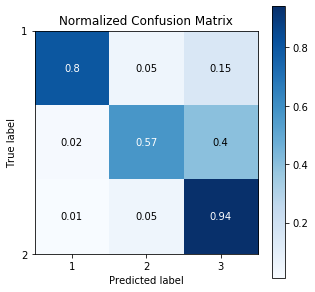

In [52]:
tree1 = DecisionTreeClassifier(max_depth = 10)
tree1.fit(X_train, y_train)
show_accuracy(tree1, 'First Tree')

Training data accuracy: 76.47%
Testing data accuracy: 76.712%
Return to Owner Precision: 89.62%
Return to Owner Recall: 79.95%
Adoption Precision: 69.17%
Adoption Recall: 97.54%


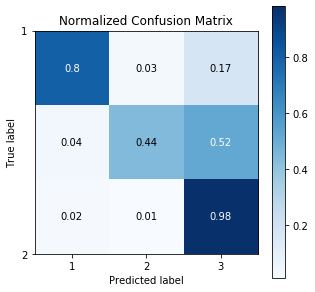

In [53]:
tree2 = DecisionTreeClassifier(max_depth = 4)
tree2.fit(X_train, y_train)
show_accuracy(tree2, 'Second Tree')

Training data accuracy: 71.609%
Testing data accuracy: 71.762%
Return to Owner Precision: 66.93%
Return to Owner Recall: 83.36%
Adoption Precision: 69.17%
Adoption Recall: 88.74%


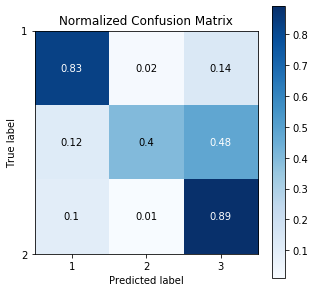

In [54]:
tree3 = DecisionTreeClassifier(max_depth = 2)
tree3.fit(X_train, y_train)
show_accuracy(tree3, 'Third Tree')

# Grad Boost

In [56]:
grid = [{'gridb__learning_rate': [.05, .1], 
         'gridb__n_estimators': [50, 100]}]

grad = Pipeline([('ss', StandardScaler()), 
                ('gridb', GradientBoostingClassifier(random_state = 123))])

grad_grid = GridSearchCV(estimator = grad, 
                          param_grid = grid, 
                          scoring = 'accuracy', 
                          cv=5)
grad_grid.fit(X_train, y_train)
grad_grid.best_params_

{'gridb__learning_rate': 0.1, 'gridb__n_estimators': 100}

Training data accuracy: 79.467%
Testing data accuracy: 79.468%
Return to Owner Precision: 91.86%
Return to Owner Recall: 81.38%
Adoption Precision: 73.35%
Adoption Recall: 94.37%


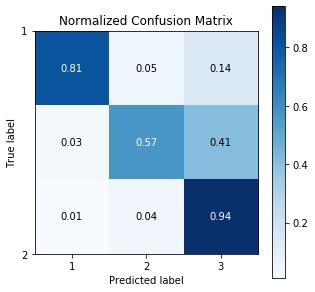

In [57]:
show_accuracy(grad_grid, 'Gradient Boost')

In [70]:
grad2 = GradientBoostingClassifier(learning_rate = .15, 
                                   max_depth = 4,
                                   n_estimators = 250,
                                   random_state = 123)
grad2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='auto',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Training data accuracy: 82.304%
Testing data accuracy: 80.242%
Return to Owner Precision: 90.99%
Return to Owner Recall: 82.13%
Adoption Precision: 75.17%
Adoption Recall: 92.66%


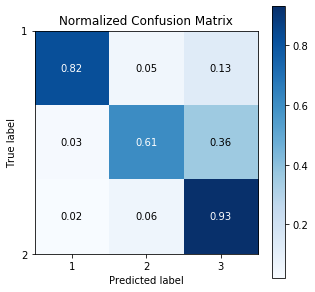

In [71]:
show_accuracy(grad2, 'Gradient Boost 2')

In [ ]:
# Started at 3:07 pm
'''
Training data accuracy: 80.188%
Testing data accuracy: 79.553%
Return to Owner Precision: 91.31%
Return to Owner Recall: 81.93%
Adoption Precision: 73.99%
Adoption Recall: 93.12%
--
second model with 200 estimators
--
Training data accuracy: 80.476%
Testing data accuracy: 79.722%
Return to Owner Precision: 91.19%
Return to Owner Recall: 82.06%
Adoption Precision: 74.34%
Adoption Recall: 92.87%
'''
# Notes: Trying again with a slightly larger max depth.  before it was 3, now trying 4
'''
Training data accuracy: 81.7%
Testing data accuracy: 80.122%
Return to Owner Precision: 91.24%
Return to Owner Recall: 82.23%
Adoption Precision: 74.89%
Adoption Recall: 92.83%
'''
# Notes: 5 wasn't a great improvement.  going back to 4 depth but 250 estimators

'''
Training data accuracy: 82.304%
Testing data accuracy: 80.242%
Return to Owner Precision: 90.99%
Return to Owner Recall: 82.13%
Adoption Precision: 75.17%
Adoption Recall: 92.66%
'''


In [80]:
xg2 = xgb.XGBClassifier(learning_rate = .1, max_depth = 6, n_estimators = 200)
xg2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [81]:
show_accuracy(xg2, 'XG Boost 2')

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81'] ['age_upon_intake_(years)', 'time_in_shelter_days', 'has_name', 'sex', 'intact', 'unk_sex', 'dog', 'cat', 'breed_Australian Cattle Dog Mix', 'breed_Australian Shepherd Mix', 'breed_Beagle Mix', 'breed_Border Collie Mix', 'breed_Boxer Mix', 'breed_Catahoula Mix', 'breed_Chihuahua Shorthair Mix', 'breed_Dachshund Mix', 'breed_Domestic Longhair Mix', 'breed_Domestic Medium Hair Mix', 'breed_Domestic Shorthair', 'breed_Domestic Shorthair Mix', 'breed_German Shepherd Mix', 'breed_Jack Russell Terrier Mix', 'breed_Labrador Retriever Mix', 'breed_Miniature Poodle Mix', 'breed_Miniature Schnauzer Mix', 'breed_Pit Bull Mix', 'breed_Rat Terrier Mix', 'breed_Siamese Mix', 'breed_Siberian Husky Mix', 'breed_Staffordshire Mix', 'breed_Yorkshire Terrier Mix', 'breed_others', 'color_Black', 'color_Black/Brown', 'color_Black/Tan', 'color_Black/White', 'color_Blue', 'color_Blue Tabby', 'color_Blue/White', 'color_Brown', 'color_Brown Brindle/White', 'color_Brown Tabby', 'color_Brown Tabby/White', 'color_Brown/Black', 'color_Brown/White', 'color_Calico', 'color_Orange Tabby', 'color_Orange Tabby/White', 'color_Red', 'color_Red/White', 'color_Tan', 'color_Tan/White', 'color_Torbie', 'color_Tortie', 'color_Tricolor', 'color_White', 'color_White/Black', 'color_White/Brown', 'color_White/Tan', 'color_others', 'found_location_7201 Levander Loop in Austin (TX)', 'found_location_Austin (TX)', 'found_location_Del Valle (TX)', 'found_location_Outside Jurisdiction', 'found_location_Travis (TX)', 'found_location_others', 'Aged', 'Feral', 'Injured', 'Normal', 'Nursing', 'Other', 'Pregnant', 'Sick', 'Euthanasia Request', 'Owner Surrender', 'Public Assist', 'Stray', 'count_1', 'count_2', 'count_3', 'count_4_plus']
expected f45, f2, f43, f11, f52, f67, f7, f5, f40, f78, f3, f39, f10, f59, f77, f74, f8, f61, f53, f24, f46, f71, f75, f9, f80, f36, f69, f1, f20, f57, f60, f12, f44, f55, f70, f15, f34, f6, f63, f73, f66, f35, f47, f50, f16, f54, f81, f64, f17, f26, f41, f38, f19, f31, f30, f32, f23, f4, f21, f37, f58, f68, f48, f14, f28, f51, f18, f72, f22, f79, f0, f13, f27, f65, f29, f56, f76, f33, f25, f62, f49, f42 in input data
training data did not have the following fields: color_Black/White, color_White/Black, Other, breed_Labrador Retriever Mix, breed_Domestic Longhair Mix, color_Brown Tabby/White, breed_Dachshund Mix, breed_Rat Terrier Mix, breed_German Shepherd Mix, color_Orange Tabby/White, color_Orange Tabby, color_Red, color_White, Nursing, Stray, count_3, breed_Domestic Shorthair Mix, age_upon_intake_(years), color_Black/Tan, color_Tricolor, breed_Australian Shepherd Mix, breed_Miniature Poodle Mix, breed_Yorkshire Terrier Mix, color_others, breed_Australian Cattle Dog Mix, color_Calico, Normal, color_Black, count_4_plus, intact, color_White/Brown, breed_Siamese Mix, color_Red/White, found_location_Travis (TX), color_Brown/Black, breed_others, cat, Sick, color_Brown, breed_Miniature Schnauzer Mix, breed_Siberian Husky Mix, sex, breed_Staffordshire Mix, unk_sex, color_Blue Tabby, found_location_Del Valle (TX), count_2, found_location_Austin (TX), breed_Jack Russell Terrier Mix, breed_Domestic Shorthair, breed_Border Collie Mix, color_Blue/White, breed_Domestic Medium Hair Mix, found_location_7201 Levander Loop in Austin (TX), Pregnant, color_Blue, color_Tan/White, breed_Pit Bull Mix, color_Brown Brindle/White, breed_Chihuahua Shorthair Mix, Aged, color_Brown Tabby, found_location_others, time_in_shelter_days, breed_Boxer Mix, Feral, breed_Catahoula Mix, Injured, color_Tan, has_name, dog, Owner Surrender, Public Assist, color_Torbie, color_Tortie, breed_Beagle Mix, color_Brown/White, count_1, Euthanasia Request, found_location_Outside Jurisdiction, color_White/Tan, color_Black/Brown

To beat:
Training data accuracy: 84.085%
Testing data accuracy: 80.425%
Return to Owner Precision: 92.03%
Return to Owner Recall: 82.57%
Adoption Precision: 75.08%
Adoption Recall: 92.8%

first move - going down to .13 learning rate from .15

Training data accuracy: 83.966%
Testing data accuracy: 80.467%
Return to Owner Precision: 92.3%
Return to Owner Recall: 82.44%
Adoption Precision: 75.13%
Adoption Recall: 92.91%

Seemed to improve everything aside from rto recall.  trying 6 max depth
Training data accuracy: 82.672%
Testing data accuracy: 80.361%
Return to Owner Precision: 91.82%
Return to Owner Recall: 82.57%
Adoption Precision: 74.8%
Adoption Recall: 93.29%

Interesting, let's try 5 max depth now. . . 
Training data accuracy: 81.638%
Testing data accuracy: 80.179%
Return to Owner Precision: 91.9%
Return to Owner Recall: 82.27%
Adoption Precision: 74.41%
Adoption Recall: 93.75%

Nope, trying 6 depth with .1 lr now
Training data accuracy: 82.088%
Testing data accuracy: 80.347%
Return to Owner Precision: 92.17%
Return to Owner Recall: 82.54%
Adoption Precision: 74.54%
Adoption Recall: 93.65%

# Model Comp:

In [55]:
model_comparison = pd.DataFrame({'Model': model_names,
                                 'Training Accuracy': train_accuracies,
                                 'Testing Accuracy': test_accuracies,
                                 'RTO Precision': rto_precisions,
                                 'RTO Recall': rto_recalls,
                                 'Adoption Precision': adopt_precisions,
                                 'Adoption Recall': adopt_recalls})
model_comparison.style.background_gradient(cmap='Blues')

,Model,Training Accuracy,Testing Accuracy,RTO Precision,RTO Recall,Adoption Precision,Adoption Recall
0,First Tree,0.803,0.792,0.925,0.805,0.733,0.936
1,Second Tree,0.765,0.767,0.896,0.8,0.692,0.975
2,Third Tree,0.716,0.718,0.669,0.834,0.692,0.887
